### This is for Big Data Aanlysis of Transactions to find whether the Transaction was frudlant or not.

In [1]:
# Hide Warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# 1.0 Reset memory
%reset -f

In [3]:
#Call libraries
import numpy as np
import pandas as pd
import seaborn as sns
# 1.2 For OS And TIME related operations
import os
import time 
# allow plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Class for applying multiple data transformation jobs
from sklearn.compose import ColumnTransformer
# Scale numeric data
from sklearn.preprocessing import StandardScaler as ss
# One hot encode data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from imblearn.over_sampling import SMOTE, ADASYN
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# Modeling by Decision Tree:
from sklearn.tree import DecisionTreeClassifier as dt
# 19.1 Also create confusion matrix using pandas dataframe
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, average_precision_score
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV as GCV
from xgboost.sklearn import XGBClassifier

# Load your training dataset (Assignemnt csv table)

In [11]:
# 2.1 Change ipython options to display all data columns
pd.options.display.max_columns = 300
os.chdir("C:\\Learn and Grow\\Big Data Learning\\Excercises\Oflus UCR final project") # Your Dir Path goes here
os.listdir()

['Anaconda3-2019.03-Windows-x86_64.exe',
 'CreditCard_FraudTransactions_ChandrasekaranNageswaran2.ipynb',
 'datasetForFinalAssignment.csv',
 'datasetForFinalTest.csv',
 'Niloy_UCR Project_Final_20th May.ipynb',
 'Reference.ipynb',
 'submissionChandrasekaranNageswaran.csv']

In [13]:
df_train=pd.read_csv('datasetForFinalAssignment.csv')
df_train.head()

,Column 1,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,N[device_id]
0,149671,285108,07/15/2015 4:36 AM,09/10/2015 2:17 PM,82661,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,2
1,84546,229053,01/07/2015 1:19 PM,01/09/2015 10:12 AM,2693,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,1
2,35978,108439,02/08/2015 9:11 PM,04/09/2015 2:26 PM,85995,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,1
3,103053,178528,04/20/2015 8:19 PM,08/03/2015 8:17 PM,151198,35,HUFZWLDYJPRCK,SEO,Chrome,F,30,2.550204e+09,0,1
4,101025,70424,07/05/2015 4:54 PM,08/25/2015 4:08 PM,73394,43,YDLNPVEWMTMMZ,Direct,IE,M,40,3.310808e+09,0,1


In [14]:
df_train.dtypes

Column 1                       int64
user_id                        int64
signup_time                   object
purchase_time                 object
signup_time-purchase_time      int64
purchase_value                 int64
device_id                     object
source                        object
browser                       object
sex                           object
age                            int64
ip_address                   float64
class                          int64
N[device_id]                   int64
dtype: object

In [15]:
df_train.drop(['Column 1'],inplace = True, axis ='columns')
df_train.columns

Index(['user_id', 'signup_time', 'purchase_time', 'signup_time-purchase_time',
       'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age',
       'ip_address', 'class', 'N[device_id]'],
      dtype='object')

In [16]:
y=df_train['class']
#y.reset_index(drop=True)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [17]:
X = df_train.drop(['class'],axis ='columns')
X.head()

,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,N[device_id]
0,285108,07/15/2015 4:36 AM,09/10/2015 2:17 PM,82661,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,2
1,229053,01/07/2015 1:19 PM,01/09/2015 10:12 AM,2693,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,1
2,108439,02/08/2015 9:11 PM,04/09/2015 2:26 PM,85995,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,1
3,178528,04/20/2015 8:19 PM,08/03/2015 8:17 PM,151198,35,HUFZWLDYJPRCK,SEO,Chrome,F,30,2.550204e+09,1
4,70424,07/05/2015 4:54 PM,08/25/2015 4:08 PM,73394,43,YDLNPVEWMTMMZ,Direct,IE,M,40,3.310808e+09,1


# Bar chart of labels

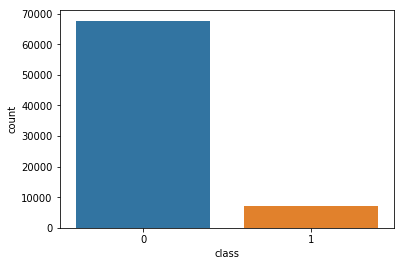

In [18]:
sns.countplot(x="class", data=df_train)

# new variables -- timeInBetween, numberUse
##### signup_time-purchase_time is already calculated hence renamed as timeInBetween, similarly N[device_id] renamed as numberUse

In [19]:
#Rename Columns names for this section
X.rename(columns={'N[device_id]':'numberUse'},inplace=True)
X.rename(columns={'signup_time-purchase_time':'timeInBetween'},inplace=True)
X.head()

,user_id,signup_time,purchase_time,timeInBetween,purchase_value,device_id,source,browser,sex,age,ip_address,numberUse
0,285108,07/15/2015 4:36 AM,09/10/2015 2:17 PM,82661,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,2
1,229053,01/07/2015 1:19 PM,01/09/2015 10:12 AM,2693,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,1
2,108439,02/08/2015 9:11 PM,04/09/2015 2:26 PM,85995,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,1
3,178528,04/20/2015 8:19 PM,08/03/2015 8:17 PM,151198,35,HUFZWLDYJPRCK,SEO,Chrome,F,30,2.550204e+09,1
4,70424,07/05/2015 4:54 PM,08/25/2015 4:08 PM,73394,43,YDLNPVEWMTMMZ,Direct,IE,M,40,3.310808e+09,1


##### Handling Object Data for training 

In [20]:
# removing not necessary Columns
X.drop(['device_id','signup_time','purchase_time','ip_address'],inplace = True, axis ='columns')

In [21]:
#Define the transformation function using columnTransformer, OHE and StandardScaler
def transform(categorical_columns,numerical_columns,df):
    cat = ('categorical', ohe() , categorical_columns  )
    num = ('numeric', ss(), numerical_columns)
    col_trans = ColumnTransformer([cat, num])
    #col_trans.fit(df)
    df_trans_scaled = col_trans.fit_transform(df)
    return df_trans_scaled

In [22]:
#Define the columns for transformations
categorical_columns = ['source', 'browser','sex']
numerical_columns = ['timeInBetween', 'purchase_value','age','numberUse']
#Define the columns for post transformation dataframe - makes referencing and understanding easier
columns = ['source_Direct','source_SEO','source_Ads','browser_Chrome','browser_FireFox','browser_IE','browser_Safari','browser_Opera','sex_M','sex_F'] + numerical_columns
columns

['source_Direct',
 'source_SEO',
 'source_Ads',
 'browser_Chrome',
 'browser_FireFox',
 'browser_IE',
 'browser_Safari',
 'browser_Opera',
 'sex_M',
 'sex_F',
 'timeInBetween',
 'purchase_value',
 'age',
 'numberUse']

In [23]:
X_ts =transform(categorical_columns, numerical_columns, X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
X_ts = pd.DataFrame(X_ts, index=X.index, columns=columns)
print (X_ts.dtypes,"\n",X_ts.shape, "\n", X_ts.head())

source_Direct      float64
source_SEO         float64
source_Ads         float64
browser_Chrome     float64
browser_FireFox    float64
browser_IE         float64
browser_Safari     float64
browser_Opera      float64
sex_M              float64
sex_F              float64
timeInBetween      float64
purchase_value     float64
age                float64
numberUse          float64
dtype: object 
 (74691, 14) 
    source_Direct  source_SEO  source_Ads  browser_Chrome  browser_FireFox  \
0            0.0         1.0         0.0             1.0              0.0   
1            0.0         0.0         1.0             1.0              0.0   
2            1.0         0.0         0.0             0.0              1.0   
3            0.0         0.0         1.0             1.0              0.0   
4            0.0         1.0         0.0             0.0              0.0   

   browser_IE  browser_Safari  browser_Opera  sex_M  sex_F  timeInBetween  \
0         0.0             0.0            0.0    0.0 

In [25]:
y=pd.DataFrame(y)
type(y),y.head()

(pandas.core.frame.DataFrame,    class
 0      0
 1      0
 2      0
 3      0
 4      0)

### Split Data in Training and Test Data set

In [26]:
#Split Data in Test_Train Set to start Modelling
X_train, X_test, y_train, y_test,indicies_tr,indicies_test = train_test_split(X_ts,y,np.arange(X_ts.shape[0]),test_size = 0.1,random_state=42)
print("X_train: shape = ",X_train.shape,"X_test Shape = ",X_test.shape,"Y_train Sample data :",y_train.shape," Y_test sample date =",y_test.shape)

X_train: shape =  (67221, 14) X_test Shape =  (7470, 14) Y_train Sample data : (67221, 1)  Y_test sample date = (7470, 1)


#### To check balance of data

In [27]:
Y_bal=np.sum(y_train)/len(y_train)
Y_bal

class    0.093587
dtype: float64

### The data is highly Imbalanced, SMOTE is being used to balance the Training data

In [28]:
sm = SMOTE(random_state=42)
X_balance, y_res = sm.fit_resample(X_train,np.asarray(y_train).ravel())

In [29]:
print("The data is", (np.sum(y_res)/len(y_res)), "imbalance. which was eralier :", Y_bal)
X_balance.shape,type(X_balance),type(y_res)

The data is 0.5 imbalance. which was eralier : class    0.093587
dtype: float64


((121860, 14), numpy.ndarray, numpy.ndarray)

In [30]:
#X_balance=pd.DataFrame(X_balance)
#y_res =pd.DataFrame(y_res)
#y_test=pd.DataFrame(y_test)
type(y_res),type(y_test),type(X_balance),y_res.shape,y_test.shape,y_test[:4],y_res[:4]

(numpy.ndarray,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 (121860,),
 (7470, 1),
        class
 16790      0
 30274      0
 71806      0
 64580      0,
 array([0, 1, 0, 1], dtype=int64))

In [31]:
#Generate the image of test dataset pre-split using indicies_test.
#This will be used to capture the unscaled values of purchase_value for computing cost of model
X_Cost = df_train.iloc[indicies_test]
X_Cost.purchase_value.head()

16790    19
30274    14
71806    32
64580    27
63643    14
Name: purchase_value, dtype: int64

In [32]:
def modelCost(test,out,df):
    #falsePositive: Cost is $8*count
    #non-fraudulent transactions (test '0') predicted as fraudulent by model (out '1')
    falsePositiveCost = df.purchase_value[(test==0) & (out==1)].count()*8
    print("falsePositive {:.0f}".format(df.purchase_value[(test==0) & (out==1)].count()))
    print("falsePositiveCost ${:.0f}".format(falsePositiveCost))
    #falseNegative: Cost is sum of purchase_value
    #fraudulent transactions (test '1') predicted as non-fraudulent by model (out '0')
    falseNegativeCost = df.purchase_value[(test==1) & (out==0)].sum()
    print("falseNegative {:.0f}".format(df.purchase_value[(test==1) & (out==0)].count()))
    print("falseNegativeCost ${:.0f}".format(falseNegativeCost))
    totalCost = falsePositiveCost + falseNegativeCost
    print("totalCost ${:.0f}".format(totalCost))
    return totalCost

In [34]:
from mlxtend.plotting import plot_confusion_matrix
def confusion_matrix_1(f):
    fig, ax = plot_confusion_matrix(conf_mat=f)
    plt.title("The Confusion Matrix Graph for ")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((f[1,1]+f[0,0])/(f[0,0] + f[0,1]+f[1,0] + f[1,1])*100)+ " %.")
    print("The recall from the confusion matrix is "+ str(f[1,1]/(f[1,0] + f[1,1])*100)+ " %.")
    print("The Precision from the confusion matrix is "+ str(f[1,1]/(f[0,1] + f[1,1])*100)+ " %.")

### start building models with Below Parameters :
#### Training Data set : X_balance  and y_res
#### Model Testing Data set : X_test,y_test

In [35]:
# set a seed for reproducibility
np.random.seed(3123)

### Model-1: LogisticRegression

In [36]:
#Running basic regression first to setup all checking and evaluation functions
log_reg = LogisticRegression(random_state=42)
start = time.time()
log_reg.fit(X_balance,y_res.ravel())
end = time.time()
(end - start) #0.31 seconds

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4566035270690918

In [37]:
out_LR = log_reg.predict(X_test)
log_reg.score(X_test, y_test) 

0.9163319946452476

In [38]:
f_lr  = confusion_matrix( y_test, out_LR )
f_lr
# 19.2 Flatten 'f' now
tp,fp,fn,tn = f_lr.ravel()
tp,fp,fn,tn

(6365, 389, 236, 480)

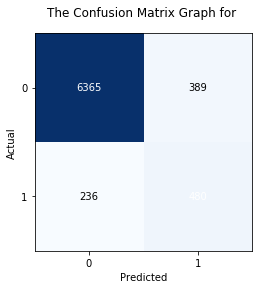

The accuracy is 91.63319946452476 %.
The recall from the confusion matrix is 67.0391061452514 %.
The Precision from the confusion matrix is 55.235903337169155 %.


In [39]:
confusion_matrix_1(f_lr)

In [40]:
#Proessing y_test for calculating cost
y_test=np.asarray(y_test)
y_test=np.reshape(y_test,len(y_test),)
y_test.shape,out_LR.shape

((7470,), (7470,))

In [41]:
# Total cost to be paid for this prediction
totalCost_lr = modelCost(y_test,out_LR,X_Cost)

falsePositive 389
falsePositiveCost $3112
falseNegative 236
falseNegativeCost $9126
totalCost $12238


###  Model -2: Decision Tree

In [42]:
ct = dt( criterion="gini",    # Alternative 'entropy'
         splitter="best",     # Alternative 'random'
         max_depth=None)
# 3.2 Train our decision tree
c_tree = ct.fit(X_balance, y_res)

In [43]:
# 4.2 Now make prediction
out_DT = ct.predict(X_test)
ct.score(X_test,out_DT) 

1.0

In [44]:
out_DT.shape,y_test.shape, type(out_DT),type(y_test)

((7470,), (7470,), numpy.ndarray, numpy.ndarray)

In [45]:
# 4.3 Get accuracy
accuracy_DT=np.sum(out_DT == y_test)/out_DT.size
print("accuracy = ", (np.sum(out_DT == y_test)/out_DT.size))

accuracy =  0.9107095046854083


In [46]:
#Calculating Confusion Matrix
f_dt  = confusion_matrix( y_test, out_DT )
f_dt
# 19.2 Flatten 'f' now
tp,fp,fn,tn = f_dt.ravel()
tp,fp,fn,tn

(6374, 380, 287, 429)

In [47]:
# 19.3 Evaluate precision/recall Parameters of Accuracy 
precision_dt = tp/(tp+fp)
recall_dt = tp/(tp + fn)

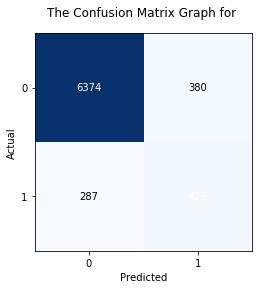

The accuracy is 91.07095046854083 %.
The recall from the confusion matrix is 59.91620111731844 %.
The Precision from the confusion matrix is 53.02843016069221 %.


In [48]:
confusion_matrix_1(f_dt)

In [49]:
# Total cost to be paid for this prediction
totalCost_DT = modelCost(y_test,out_DT,X_Cost)

falsePositive 380
falsePositiveCost $3040
falseNegative 287
falseNegativeCost $11023
totalCost $14063


## XGBClassifier model with GridSearch Parameter Optimizer

In [50]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)        # Specify other parameters here
            )
            ]
pipe_xg = Pipeline(steps_xg)

##### Parameters consideres here are already collected as Best Hyer Parameter from Bayesian Optimization.

In [51]:
parameters = {'xg__learning_rate':  [0.875], 	# can be anything from 0.02 to 0.8
              'xg__n_estimators':   [206,207,215],  	# can be from 100 to 300
              'xg__max_depth':      [9,10], 			# which gives me best result
              'pca__n_components' : [9]			# how many N depth i want
              }                               # Total: 2 * 2 * 2 * 2


In [52]:
# Create Grid Search object first with all necessary prameters
clf = GCV(pipe_xg,            # pipeline object
          parameters,         # possible parameters
          n_jobs = 5,         # USe parallel cpu threads
          cv =5 ,             # No of folds => 2 means the data will be devided in 2 parts
          verbose =2,         # Higher the value, more the verbosity
          scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
          refit = 'roc_auc'   # Refitting final model on what parameters?
          )

In [53]:
#Start fitting data to pipeline
start = time.time()
clf.fit(X_balance, y_res.ravel())
end = time.time()
(end-start)/60

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed: 19.1min finished


20.397961390018462

In [54]:
#Start Prediction
out_gs=clf.predict(X_test)

In [55]:
#f"Best score: {clf.best_score_}"
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 9, 'xg__learning_rate': 0.875, 'xg__max_depth': 10, 'xg__n_estimators': 215}"

In [56]:
print("Test Data",y_test.shape, "Predicted Size",out_gs.shape)

Test Data (7470,) Predicted Size (7470,)


In [57]:
#Get Precision and Recall
f_gs = confusion_matrix( y_test, out_gs )
#tp,fp,fn,tn = f_gs
tp,fp,fn,tn
precision_gs = tp/(tp+fp)
recall_gs = tp/(tp + fn)
accuracy_gs = np.sum(out_gs == y_test)/out_gs.size
print("GS Precions :",precision_gs,"GS Recall :",recall_gs,"accuracy = ", (np.sum(out_gs == y_test)/out_gs.size))

GS Precions : 0.9437370447142434 GS Recall : 0.9569133763699145 accuracy =  0.8579651941097725


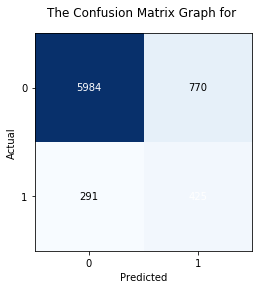

The accuracy is 85.79651941097724 %.
The recall from the confusion matrix is 59.357541899441344 %.
The Precision from the confusion matrix is 35.56485355648535 %.
falsePositive 770
falsePositiveCost $6160
falseNegative 291
falseNegativeCost $11367
totalCost $17527


In [58]:
confusion_matrix_1(f_gs)
# Total cost to be paid for this prediction
totalCost_GS = modelCost(y_test,out_gs,X_Cost)

### Compare Cost coming from all of the above models

In [59]:
totalCost_lr,totalCost_DT,totalCost_GS

(12238, 14063, 17527)

Now Predicting the fraudlant transactions on Test data with Model that is giving latest cost

In [60]:
# Read the test data file
df_test=pd.read_csv("datasetForFinalTest.csv")
df_test.head()

,Column 1,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,N[device_id]
0,73178,328855,03/11/2015 12:54 AM,04/05/2015 12:23 PM,36689,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,1
1,63154,328496,07/23/2015 12:48 PM,10/20/2015 1:01 PM,128173,40,HTOCRWCBYIQJI,Ads,Safari,M,33,2.185371e+09,1
2,45469,97677,05/11/2015 2:28 AM,07/20/2015 9:37 PM,101949,79,GNVLAANUJMKFC,SEO,Chrome,F,27,2.821272e+09,2
3,64425,272080,06/23/2015 12:15 PM,08/26/2015 1:42 AM,91527,40,NBCCGOYVYSVAV,SEO,FireFox,M,20,1.074954e+09,1
4,125042,341169,03/08/2015 1:08 PM,05/15/2015 6:48 AM,97540,43,YQWZFJBVAAGEI,SEO,IE,M,40,2.981257e+09,1


In [61]:
X_test=pd.DataFrame(df_test)
#Processing Data so that data file is ready for Predicting in Model.
X_test=X_test.drop(['Column 1','device_id','signup_time','purchase_time','ip_address'],inplace = True, axis =1)
X_test=pd.DataFrame(X_test)
type(X_test)

pandas.core.frame.DataFrame

In [62]:
#Define the transformation function using columnTransformer, OHE and StandardScaler
def transform(categorical_columns,numerical_columns,df):
    cat = ('categorical', ohe() , categorical_columns  )
    num = ('numeric', ss(), numerical_columns)
    col_trans = ColumnTransformer([cat, num])
    df_trans_scaled = col_trans.fit_transform(df)
    return df_trans_scaled

#Define the columns for transformations
categorical_columns = ['source', 'browser','sex']
numerical_columns = ['signup_time-purchase_time', 'purchase_value','age','N[device_id]']
#Define the columns for post transformation dataframe - makes referencing and understanding easier
columns = ['source_Direct','source_SEO','source_Ads','browser_Chrome','browser_FireFox','browser_IE','browser_Safari','browser_Opera','sex_M','sex_F'] + numerical_columns
columns

['source_Direct',
 'source_SEO',
 'source_Ads',
 'browser_Chrome',
 'browser_FireFox',
 'browser_IE',
 'browser_Safari',
 'browser_Opera',
 'sex_M',
 'sex_F',
 'signup_time-purchase_time',
 'purchase_value',
 'age',
 'N[device_id]']

In [63]:
#Rename Columns names for this section
X_test_ts =transform(categorical_columns,numerical_columns,df_test)
X_test_ts.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(13413, 14)

In [64]:
#Prediction on the Test Data set
Y_predi = log_reg.predict(X_test_ts)

In [65]:
Y_prediction=pd.DataFrame(Y_predi)
Y_prediction.head(), Y_prediction.shape

(   0
 0  0
 1  0
 2  1
 3  0
 4  0, (13413, 1))

In [66]:
Final_Output = pd.concat([df_test, Y_prediction], axis=1)

In [67]:
Final_Output.rename(columns={0:'Prediction'},inplace=True)
Final_Output.head()

,Column 1,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,N[device_id],Prediction
0,73178,328855,03/11/2015 12:54 AM,04/05/2015 12:23 PM,36689,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,1,0
1,63154,328496,07/23/2015 12:48 PM,10/20/2015 1:01 PM,128173,40,HTOCRWCBYIQJI,Ads,Safari,M,33,2.185371e+09,1,0
2,45469,97677,05/11/2015 2:28 AM,07/20/2015 9:37 PM,101949,79,GNVLAANUJMKFC,SEO,Chrome,F,27,2.821272e+09,2,1
3,64425,272080,06/23/2015 12:15 PM,08/26/2015 1:42 AM,91527,40,NBCCGOYVYSVAV,SEO,FireFox,M,20,1.074954e+09,1,0
4,125042,341169,03/08/2015 1:08 PM,05/15/2015 6:48 AM,97540,43,YQWZFJBVAAGEI,SEO,IE,M,40,2.981257e+09,1,0


In [68]:
Final_Output.to_csv('Hemant_Result_tosubmit.csv')